<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BC%D0%B5%D1%80%D0%B5%D0%B6%D1%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [183]:
import pandas as pd

Дані про морське вухо(молюск)

<div>
<img src="https://m.media-amazon.com/images/I/81-FC5TlLtL.jpg" width="500"/>
</div>

In [184]:
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/abalone.csv')
df.drop(columns=['Type', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'], inplace=True)

In [185]:
df.head()

,LongestShell,Diameter,Height,Rings
0,0.455,0.365,0.095,15
1,0.350,0.265,0.090,7
2,0.530,0.420,0.135,9
3,0.440,0.365,0.125,10
4,0.330,0.255,0.080,7


In [186]:
df.shape

(4177, 4)

In [187]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

In [188]:
device

'cuda'

Потрібно на основі розмірів молюска спрогнозувати кількість кілець в мушлі `Rings`. Використовуйте процесор cpu

# Завдання 1
Створіть клас Dataset

In [189]:
from torch.utils.data import Dataset


class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values).to(device)
      self.y = torch.FloatTensor(y.values).to(device)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns=['Rings'])
y = df['Rings']

dataset = MyDataset(X, y)

# Завдання 2
Створіть DataLoader. Перевірте розміри даних в першому пакеті. Розмір пакетів оберіть самостійно

In [190]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader = DataLoader(dataset,  # датасет з даними
                        batch_size=batch_size,  # кількість даних в одному пакеті
                        shuffle=True,  # чи треба перемішувати дані
                        generator=torch.Generator(device=device)) # підключення до процесора)

# Завдання 3
Створіть нейромережу:
* Кількість шарів оберіть між 1-3
* Виберіть різні функції активації: Relu, LeakyRelu, Swish
* Кілкість нейронів у прихованих шарах повинна **не зростати**

In [191]:
from torch import nn


model = nn.Sequential(
    nn.Linear(3, 7),
    nn.Hardswish(),
    nn.Linear(7, 5),
    nn.Hardswish(),
    nn.Linear(5, 1)
)

model

Sequential(
  (0): Linear(in_features=3, out_features=7, bias=True)
  (1): Hardswish()
  (2): Linear(in_features=7, out_features=5, bias=True)
  (3): Hardswish()
  (4): Linear(in_features=5, out_features=1, bias=True)
)

In [192]:
from torchsummary import summary

summary(model, input_size=(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 7]              28
         Hardswish-2                    [-1, 7]               0
            Linear-3                    [-1, 5]              40
         Hardswish-4                    [-1, 5]               0
            Linear-5                    [-1, 1]               6
Total params: 74
Trainable params: 74
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Завдання 4
Визначте функцію втрат та оптимізатор

In [193]:
# Функція втрат середньоквадратичної помилки (MSE) для регресії
loss_fn = nn.MSELoss()

# Оптимізатор (SGD) для оновлення ваг моделі
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Завдання 5
Натренуйте нейромережу. візміть невелику кількість епох

In [194]:
import numpy as np

num_epochs = 10
losses = []

for epoch in range(num_epochs):
  losses_ = []
  for X_batch, y_batch in dataloader:
        # пряме пошерення
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        losses_.append(loss.item())

        # Зворотнє поширення
        loss.backward() # рахуємо градієнти
        optimizer.step()
        optimizer.zero_grad()

  losses.append(np.mean(losses_))

  if epoch % 1 == 0:
          print(f'loss={losses[-1]}')

loss=30.46239857240157
loss=8.26330736911658
loss=7.92823381134958
loss=7.591836293538411
loss=7.349773522579309
loss=7.242172638575236
loss=7.151120243650494
loss=7.051320726221258
loss=7.027084119392164
loss=7.030365698265307


(0.0, 200.0)

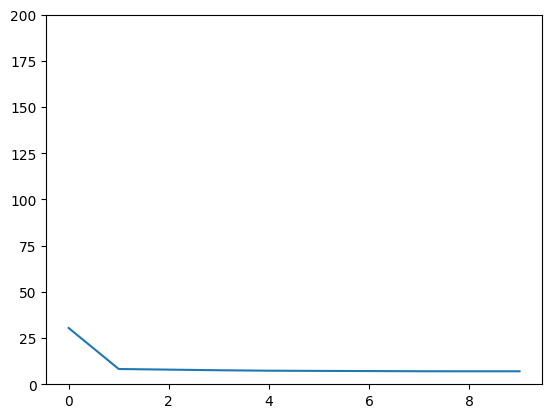

In [195]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylim(0, 200)

# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [196]:
torch.save(model, 'model.pt')

In [197]:
load_model = torch.load('model.pt')

In [198]:
X.iloc[:1]

,LongestShell,Diameter,Height
0,0.455,0.365,0.095


In [199]:
X_data = torch.FloatTensor(X.iloc[:1].values)
X_data = X_data.to(device)

print(X_data)
print(X_data.shape)

tensor([[0.4550, 0.3650, 0.0950]], device='cuda:0')
torch.Size([1, 3])


In [200]:
load_model(X_data)

tensor([[8.6827]], device='cuda:0', grad_fn=<AddmmBackward0>)